##  1. Общее описание

**Аналитическая задача** — провести анализ данных с целью выделения портрета клиентов, которые будут открывать карту, и портрета клиентов, которые не будут открывать карту.

## Описание данных
Каждый клиент описывается следующим набором признаков:

|Признак|Комментарий|
|--:|:--|
|`client_id`|Идентификационный номер|
|`gender`|Пол|
|`age`|Возраст|
|`marital_status`|Семейный статус|
|`job_position`|Работа|
|`credit_sum`|Сумма кредита|
|`credit_month`|Срок кредитования|
|`score_shk`|Внутренняя скоринговая оценка|
|`education`|Образование|
|`tariff_id`|Идентификационный номер тарифа|
|`living_region`|Регион|
|`monthly_income`|Месячный заработок|
|`credit_count`|Количество кредитов у клиента|
|`overdue_credit_count`|Количество просроченных кредитов у клиента|
|`open_account_flg`|Факт открытия кредитного счета в данном банке|
|`avregzarplata`|Средняя заработная плата в регионе|
|`okrug`|Федеральный округ|
|date_bank|Дата обращения в банк|

## Примерный план по выполнению проекта

**Шаг 1.** Загрузка данных;

**Шаг 2.** Первичная обработка данных:
- скорректировать заголовки;
- скорректировать типы признаков;
- проверить наличие дублирующихся записей;
- проверить наличие аномальных значений;
- восстановить пропущенные значения;

**Шаг 3.** Провести исследовательский анализ данных:
- исследовать распределения признаков;
- исследовать возможные зависимости между признаками;

**Шаг 4.** Отбор признаков и портреты клиентов:
- исследовать признаки в разрезе групп;
- выявить наличие значимых различий в значениям признаков в разрезе групп;
- сформулировать и проверить гипотезы о равенстве значений показателей по группам

**Шаг 5.** Построить классификационные модели
- Построить несколько моделей классификации и сравнить их.
- исследовать возможные зависимости между признаками.

# Импорт библиотек и модулей

In [ ]:
# загрузка библиотек
import pandas as pd
import numpy as np

# визуализация
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style('darkgrid')

# мат стат и время
import math
import statistics
import datetime as dt
import scipy.stats as st

# для проверки гипотез о виде закона распределения
from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import ks_2samp
from scipy.stats import anderson
from scipy.stats import jarque_bera

# для проверки гипотез о равенстве параметров распределений
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from scipy import stats

In [ ]:
# читаем файл с данными
df = pd.read_csv('/content/vkr_dataset_open_credit_card.csv')

# Файл загружен и успешно прочитан

In [ ]:
df.head(2)

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,score_shk,education,tariff_id,living_region,okrug,avregzarplata,monthly_income,credit_count,overdue_credit_count,open_account_flg,date_bank
0,1,2,48.0,3.0,15,59998,10,"0,770249",2.0,28,23.0,8.0,25850.0,30000.0,1.0,1.0,0,2016-02-16 18:54:34
1,2,1,28.0,NaN,15,10889,6,"0,248514",2.0,2,30.0,7.0,66880.0,43000.0,2.0,0.0,0,2016-02-15 12:39:04


In [ ]:
df.info() # смотрим пропуски и типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_id             170746 non-null  int64  
 1   gender                170746 non-null  int64  
 2   age                   170744 non-null  float64
 3   marital_status        170741 non-null  float64
 4   job_position          170746 non-null  int64  
 5   credit_sum            170745 non-null  object 
 6   credit_month          170746 non-null  int64  
 7   score_shk             170743 non-null  object 
 8   education             170743 non-null  float64
 9   tariff_id             170746 non-null  int64  
 10  living_region         170554 non-null  float64
 11  okrug                 170554 non-null  float64
 12  avregzarplata         170554 non-null  float64
 13  monthly_income        170744 non-null  float64
 14  credit_count          161516 non-null  float64
 15  

In [ ]:
# приведение типов

In [ ]:
df['credit_sum'] = df['credit_sum'].str.split(',').str.get(0)

In [ ]:
df['score_shk'] = df['score_shk'].str.replace(",", '.')

In [ ]:
df = df.astype({'date_bank' : 'datetime64[ns]', 'credit_sum' : 'float64', 'score_shk' : 'float64'}, errors = 'ignore')

In [ ]:
# корректировка произведена
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   client_id             170746 non-null  int64         
 1   gender                170746 non-null  int64         
 2   age                   170744 non-null  float64       
 3   marital_status        170741 non-null  float64       
 4   job_position          170746 non-null  int64         
 5   credit_sum            170745 non-null  float64       
 6   credit_month          170746 non-null  int64         
 7   score_shk             170743 non-null  float64       
 8   education             170743 non-null  float64       
 9   tariff_id             170746 non-null  int64         
 10  living_region         170554 non-null  float64       
 11  okrug                 170554 non-null  float64       
 12  avregzarplata         170554 non-null  float64       
 13 

# Проверка наличия дублирующихся записей

In [ ]:
# дубли
df.duplicated().sum()

0

# Поиск и работа с аномалиями

In [ ]:
# группируем на категориальные и непрерывные признаки
cont_var = ['avregzarplata', 'age', 'monthly_income', 'credit_sum', 'score_shk']
cat_var = ['gender', 'marital_status', 'job_position', 'credit_month', 'education', 'tariff_id', 'living_region', 'okrug', 'credit_count', 'overdue_credit_count', 'open_account_flg']

Функция по расчету усов

In [ ]:
def calc_boxplot(df_col:pd.Series) -> tuple:
    Q1, median, Q3 = np.percentile(np.asarray(df_col.dropna()), [25, 50, 75])
    IQR = Q3 - Q1
    n_us = Q1 - 1.5 * IQR
    v_us = Q3 + 1.5 * IQR
    wisklo = np.compress(np.asarray(df_col) >= n_us, np.asarray(df_col))
    wiskhi = np.compress(np.asarray(df_col) <= v_us, np.asarray(df_col))
    actual_loval = np.min(wisklo)
    actual_hival = np.max(wiskhi)
    return actual_loval, actual_hival

Функции для поиска значений: медиана, мода, среднее

In [ ]:
# функция чтобы найти медиану
def median_f(x):
    return x.median()

# функция чтобы найти моду
def moda_f(x):
    return statistics.mode(x)

# функция чтобы найти выб. ср.
def mean_f(x):
    return x.mean()

Строим графики: ящики с усами и графики плотности для непрерывных признаков.

<ipython-input-15-061ad83f1ffa>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 2, 2*index + 1)
<ipython-input-15-061ad83f1ffa>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 2, 2*index + 2)


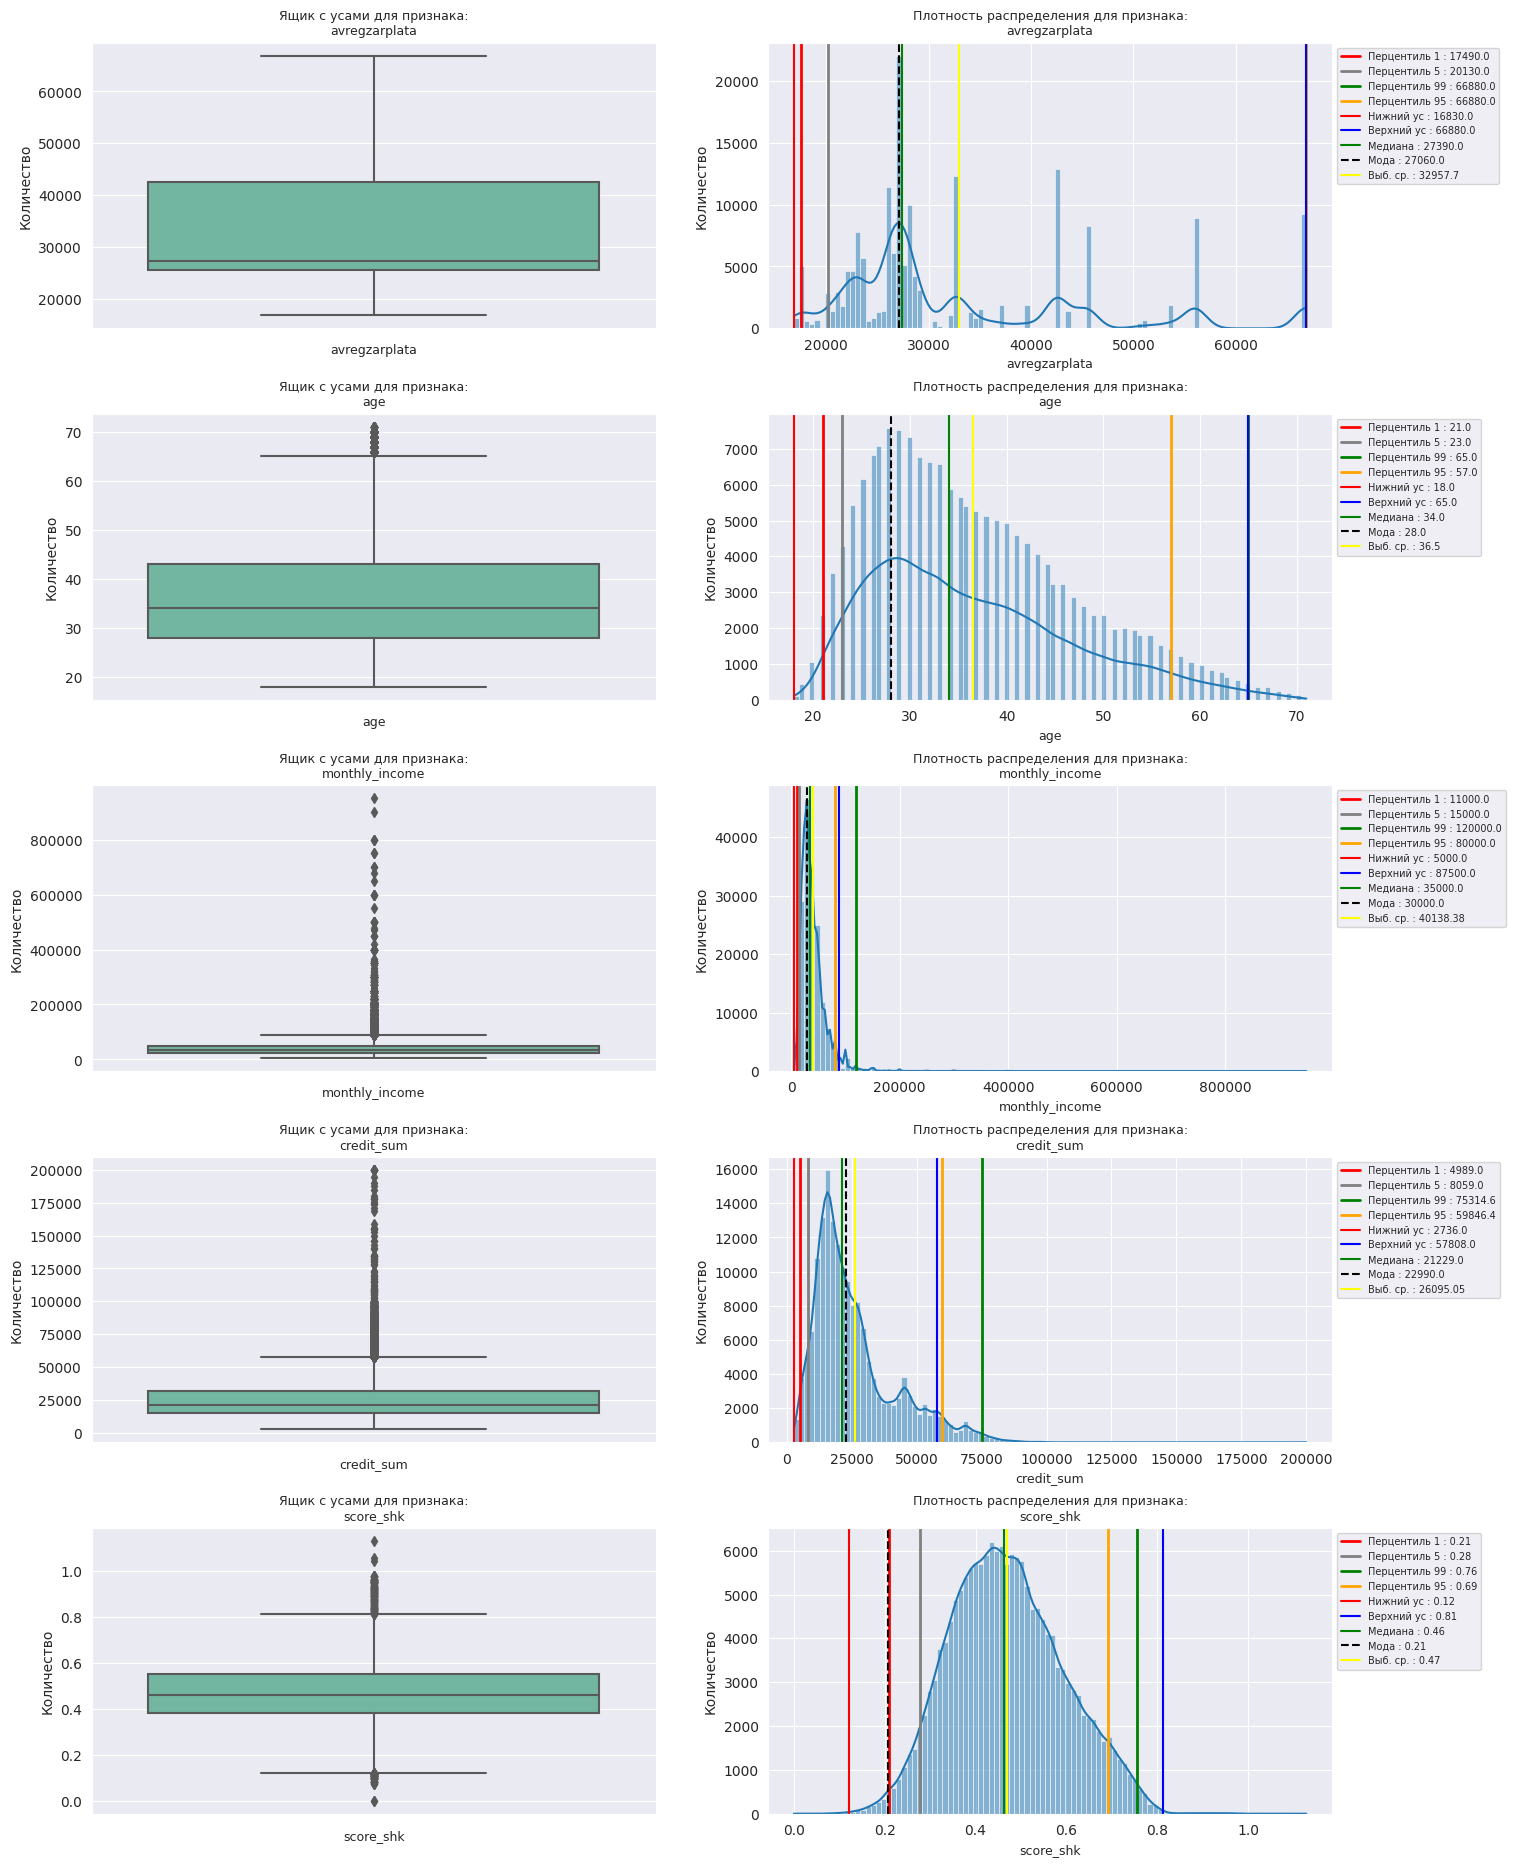

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (16, 23), sharey = True)
index = 0  # переменная, отвечающая за номер рисунка

for index, col_name in enumerate(cont_var):

    plt.subplot(5, 2, 2*index + 1)
    ax = sns.boxplot(y = df[col_name], palette = "Set2")
    plt.title(('Ящик с усами для признака:\n{}'.format(col_name)), fontsize = 9)
    plt.ylabel('Количество', fontsize = 10)
    plt.xlabel(col_name, fontsize = 9)

    plt.subplot(5, 2, 2*index + 2)
    ax = sns.histplot(x = df[col_name], bins = 100, kde = True)
    plt.title(('Плотность распределения для признака:\n{}'.format(col_name)), fontsize = 9)
    plt.ylabel('Количество', fontsize = 10)
    plt.xlabel(col_name, fontsize = 9)

# перцентили
    ax.axvline(np.percentile(df[col_name].dropna(), 1),
              color = 'red',
              label = 'Перцентиль 1 : {}'.format(round(np.percentile(df[col_name].dropna(), 1), 2)),
              linewidth = 2)
    ax.axvline(np.percentile(df[col_name].dropna(), 5),
          color = 'grey',
          label = 'Перцентиль 5 : {}'.format(round(np.percentile(df[col_name].dropna(), 5), 2)),
          linewidth = 2)
    ax.axvline(np.percentile(df[col_name].dropna(), 99),
              color = 'green',
              label = 'Перцентиль 99 : {}'.format(round(np.percentile(df[col_name].dropna(), 99), 2)),
              linewidth = 2)
    ax.axvline(np.percentile(df[col_name].dropna(), 95),
          color = 'orange',
          label = 'Перцентиль 95 : {}'.format(round(np.percentile(df[col_name].dropna(), 95), 2)),
          linewidth = 2)
# усы
    ax.axvline(calc_boxplot(df[col_name])[0],
              color = 'red',
              label = 'Нижний ус : {}'.format(round(calc_boxplot(df[col_name])[0], 2)))
    ax.axvline(calc_boxplot(df[col_name])[1],
              color ='blue',
              label = 'Верхний ус : {}'.format(round(calc_boxplot(df[col_name])[1], 2)))
# медиана, мода, среднее:
    ax.axvline(median_f(df[col_name]),
              color = 'green',
              label = 'Медиана : {}'.format(round(median_f(df[col_name]), 2)))
    ax.axvline(moda_f(df[col_name]),
              color = 'black',
              linestyle = 'dashed',
              label = 'Мода : {}'.format(round(moda_f(df[col_name]), 2)))
    ax.axvline(mean_f(df[col_name]),
              color = 'yellow',
              label = 'Выб. ср. : {}'.format(round(mean_f(df[col_name]), 2)))
    lines = []
    labels = []
    for ax in fig.axes:
        Line, Label = ax.get_legend_handles_labels()
        lines.extend(Line)
        labels.extend(Label)
    ax.legend(bbox_to_anchor = (1, 1), loc ='upper left', fontsize = 7)   # легенда к каждому графику, если ко всему рисунку - fig.legend()
plt.subplots_adjust(hspace = 0.3)
plt.show()

Исходя из полученных визуальных данных, и рассчитанных перцентилей - убираем аномалии признаков "monthly_income" и "credit_sum"- по 99 перцентилю.

In [ ]:
income_perc_99 = round(np.percentile(df['monthly_income'].dropna(), 99), 2)
credit_perc_99 = round(np.percentile(df['credit_sum'].dropna(), 99), 2)
print(f'99 перцентиль признаков: *monthly_income* = {income_perc_99}, для признака *credit_sum* = {credit_perc_99}')
df_copy = df[(df['monthly_income'] <= 120000.0) & (df['credit_sum'] <= 75314.6)]
# df_copy # датафрейм без аномалий

99 перцентиль признаков: *monthly_income* = 120000.0, для признака *credit_sum* = 75314.6


Анализируем, сколько строк потеряно в количестве и в процентах

In [ ]:
num_rows = df['monthly_income'].shape[0]
num_rows_2 = df_copy['monthly_income'].shape[0]
lost_count = num_rows - num_rows_2
lost_perc = round(((lost_count*100) / num_rows), 2)
print(f'Количество удаленных строк: {lost_count}.\
  Процент потери данных после удаления аномалий: {lost_perc} %')

Количество удаленных строк: 3252.  Процент потери данных после удаления аномалий: 1.9 %


<ipython-input-18-61188a460afd>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 2, 2*index + 1)
<ipython-input-18-61188a460afd>:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 2, 2*index + 2)


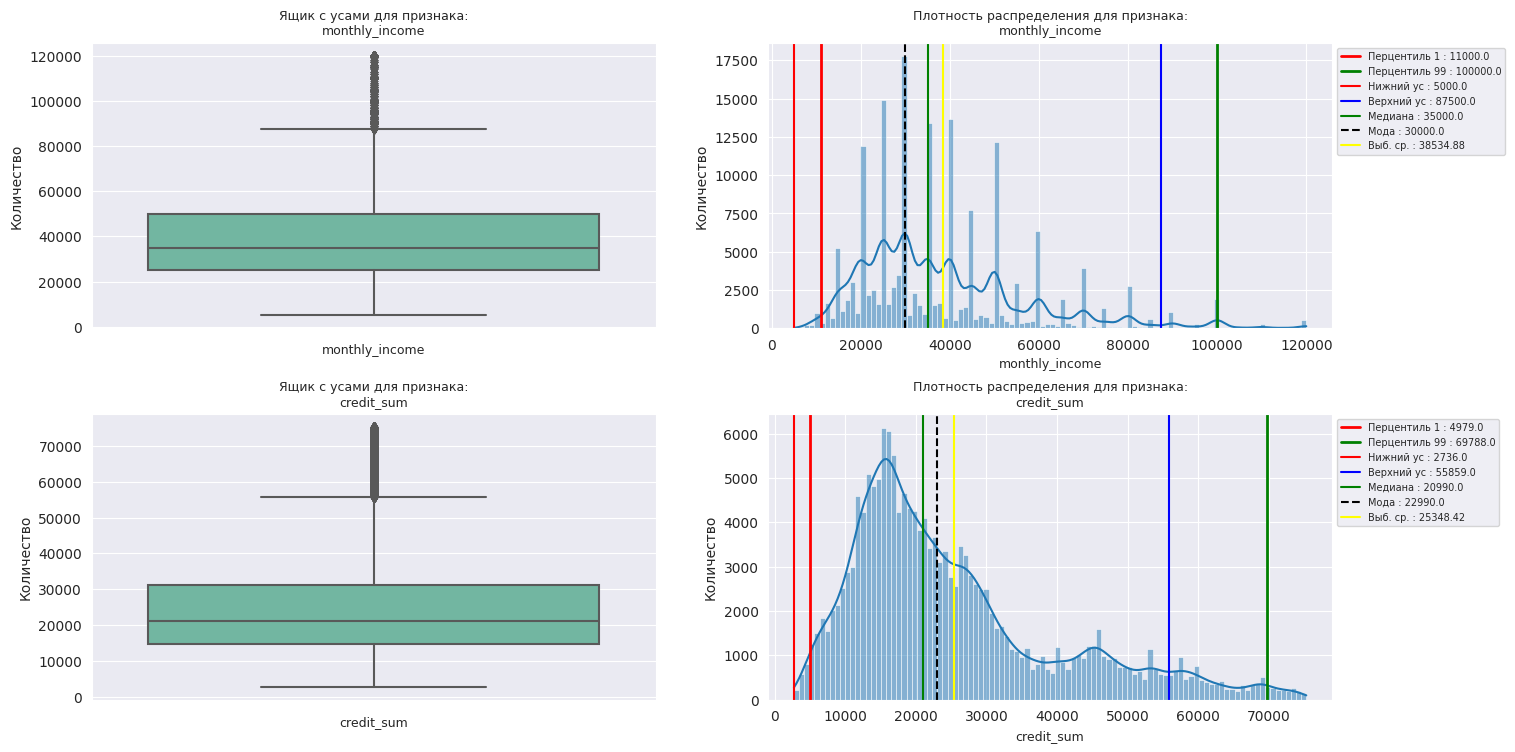

In [ ]:
# проверяем графики после удаления аномальных значений
check = ["monthly_income", "credit_sum"]
fig, axes = plt.subplots(1, 2, figsize = (16, 23), sharey = True)
index = 0  # переменная, отвечающая за номер рисунка

for index, col_name in enumerate(check):

    plt.subplot(5, 2, 2*index + 1)
    ax = sns.boxplot(y = df_copy[col_name], palette = "Set2")
    plt.title(('Ящик с усами для признака:\n{}'.format(col_name)), fontsize = 9)
    plt.ylabel('Количество', fontsize = 10)
    plt.xlabel(col_name, fontsize = 9)

    plt.subplot(5, 2, 2*index + 2)
    ax = sns.histplot(x = df_copy[col_name], bins = 100, kde = True)
    plt.title(('Плотность распределения для признака:\n{}'.format(col_name)), fontsize = 9)
    plt.ylabel('Количество', fontsize = 10)
    plt.xlabel(col_name, fontsize = 9)

# перцентили
    ax.axvline(np.percentile(df_copy[col_name].dropna(), 1),
              color = 'red',
              label = 'Перцентиль 1 : {}'.format(round(np.percentile(df_copy[col_name].dropna(), 1), 2)),
              linewidth = 2)
    ax.axvline(np.percentile(df_copy[col_name].dropna(), 99),
              color = 'green',
              label = 'Перцентиль 99 : {}'.format(round(np.percentile(df_copy[col_name].dropna(), 99), 2)),
              linewidth = 2)
# усы
    ax.axvline(calc_boxplot(df_copy[col_name])[0],
              color = 'red',
              label = 'Нижний ус : {}'.format(round(calc_boxplot(df_copy[col_name])[0], 2)))
    ax.axvline(calc_boxplot(df_copy[col_name])[1],
              color ='blue',
              label = 'Верхний ус : {}'.format(round(calc_boxplot(df_copy[col_name])[1], 2)))
# медиана, мода, среднее:
    ax.axvline(median_f(df_copy[col_name]),
              color = 'green',
              label = 'Медиана : {}'.format(round(median_f(df_copy[col_name]), 2)))
    ax.axvline(moda_f(df_copy[col_name]),
              color = 'black',
              linestyle = 'dashed',
              label = 'Мода : {}'.format(round(moda_f(df_copy[col_name]), 2)))
    ax.axvline(mean_f(df_copy[col_name]),
              color = 'yellow',
              label = 'Выб. ср. : {}'.format(round(mean_f(df_copy[col_name]), 2)))
    lines = []
    labels = []
    for ax in fig.axes:
        Line, Label = ax.get_legend_handles_labels()
        lines.extend(Line)
        labels.extend(Label)
    ax.legend(bbox_to_anchor = (1, 1), loc ='upper left', fontsize = 7)   # легенда к каждому графику. если ко всему рисунку - fig.legend()
plt.subplots_adjust(hspace = 0.3)
plt.show()

Рекомендуется рассмотреть и проанализировать отдельно клиентов, имеющих доход свыше 120 000 и, если сумма кредита превышает 75 314 руб.

# Работа с пропусками

In [ ]:
print('количество пропусков в каждом из столбцов:','\n', df_copy.isna().sum())
print('\n', 'количество пропусков всего в DF:','\n', df_copy.isna().sum().sum())

количество пропусков в каждом из столбцов: 
 client_id                  0
gender                     0
age                        2
marital_status             4
job_position               0
credit_sum                 0
credit_month               0
score_shk                  3
education                  3
tariff_id                  0
living_region            188
okrug                    188
avregzarplata            188
monthly_income             0
credit_count            9122
overdue_credit_count    9122
open_account_flg           0
date_bank                  0
dtype: int64

 количество пропусков всего в DF: 
 18820


In [ ]:
df_copy = df_copy.dropna(subset=['age','marital_status', 'score_shk', 'education']) # пропуски по этим признакам единичны - удаляем

In [ ]:
columns_1 = ['living_region', 'okrug', 'avregzarplata']
df_copy[columns_1] = df_copy[columns_1].fillna(df_copy[columns_1].median()) # заменяем пропуски медианой
columns_2 = ['credit_count', 'overdue_credit_count']
df_copy[columns_2] = df_copy[columns_2].fillna(df_copy[columns_2].median())
# df_copy.info()
# восстановление пропущенных значений выполнено

In [ ]:
df_copy.info()

# Исследовательский анализ данных

Исследуем непрерывные признаки с помощью графиков плотности. Для сравнения визуализированы одновременно обе группы целевой переменной.

In [ ]:
print(f'Непрерывные признаки: {cont_var}')
print(f'Категориальные признаки: {cat_var}')

Непрерывные признаки: ['avregzarplata', 'age', 'monthly_income', 'credit_sum', 'score_shk']
Категориальные признаки: ['gender', 'marital_status', 'job_position', 'credit_month', 'education', 'tariff_id', 'living_region', 'okrug', 'credit_count', 'overdue_credit_count', 'open_account_flg']


<ipython-input-24-20e55764544c>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, index)
<ipython-input-24-20e55764544c>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, index)


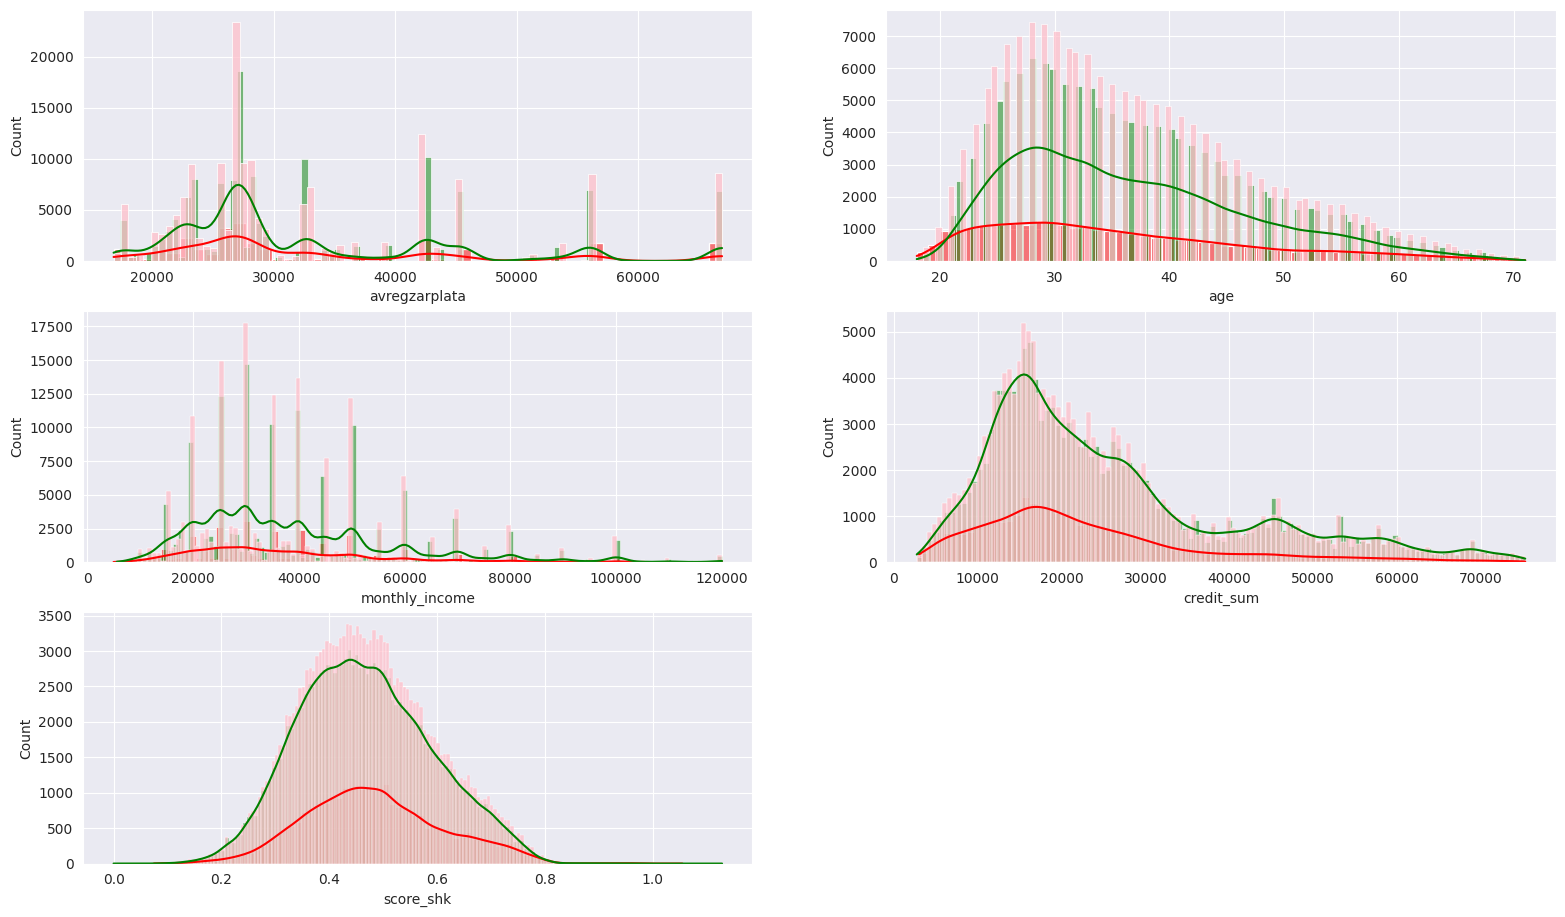

In [ ]:
fig, ax = plt.subplots(2, figsize = (19,15))

for index, col in enumerate(cont_var, start = 1):
    plt.subplot(4, 2, index)
    sns.histplot(df_copy[df_copy.open_account_flg == 1][col].dropna(), kde = True, color = 'red')
    sns.histplot(df_copy[df_copy.open_account_flg == 0][col].dropna(), kde = True, color = 'green')
    sns.histplot(df_copy[col], color = 'pink')

Визуально, нет сильных различий между группой клиентов, открывших счет в банке и нет.

Распределения (кроме скоринговой оценки) не похожи на нормальные - их следует сравнивать в отношении равенства медиан.

In [ ]:
df_copy.groupby('open_account_flg')[cont_var].median().round(2)

,avregzarplata,age,monthly_income,credit_sum,score_shk
open_account_flg,,,,,
0,27390.0,35.0,35000.0,21344.0,0.46
1,27390.0,33.0,34000.0,19588.0,0.47


*Выводы по анализу непрерывных признаков:*

Клиенты, открывшие счет, в среднем младше

Клиенты, открывшие счет, в среднем имеют меньший ежемесячный доход

Клиенты, открывшие счет, в среднем сумма кредита меньше

Клиенты, открывшие счет, имеют более высокую скоринговую оценку



Для проверки гипотез, определим выборки по клиентам, которые открыли счет в банке и не открыли:

*   X = df_copy[df_copy.open_account_flg == 1].monthly_income
*   Y = df_copy[df_copy.open_account_flg == 0].monthly_income

Сформулируем гипотезы о нормальности распределения:
1.  Гипотеза H0. Выборка клиентов, открывших счет в банке (open_account_flg = 1) имеет нормальное распределение.
2.  Гипотеза H1. Выборка клиентов, открывших счет в банке (open_account_flg = 1) имеет распределение отличное от нормального.

С помощью теста Шапиро и Комагорова-Смирнова проверим укзанные выборки на подчинение нормальному закону распределения.

In [ ]:
# проверка на подчинение нормальному закону распределения выборка клиентов открывших счет в банке (срез первых 4500 записей , тест не правдив для более чем 5000 записей)
print(shapiro(df_copy[df_copy.open_account_flg == 1].monthly_income[:4500]))
print(kstest(df_copy[df_copy.open_account_flg == 1].monthly_income,
       'norm',
       args =
        (df_copy.monthly_income.mean(),
       df_copy.monthly_income.std())))

ShapiroResult(statistic=0.8984449505805969, pvalue=0.0)
KstestResult(statistic=0.1564932718070955, pvalue=0.0, statistic_location=40000.0, statistic_sign=1)


Вывод. Оба теста : Шапиро и Колмагорова-Смирнова показали:

Выборка клиентов, открывших счет в банке имеет распределение, отличное от нормального: pvalue = 0.0 < α = 0.05 - гипотезу H0 отвергаем,
  *   гипотезу Н1 принимаем - **Выборка не подчиняется нормальному распределению**

Формулировка гипотез по второй группе (клиенты, которые не открывали счет в банке) следующая:
1.  Гипотеза H0. Выборка клиентов, которые не открывали счет (open_account_flg = 0) имеет нормальное распределение.
2.  Гипотеза H1. Выборка клиентов,  которые не открывали счет (open_account_flg = 0) имеет распределение отличное от нормального.


In [ ]:
# проверка на подчинение нормальному закону распределения - выборка клиентов, которые не открывали счет
print(shapiro(df_copy[df_copy.open_account_flg == 0].monthly_income[:4500]))
print(kstest(df_copy[df_copy.open_account_flg == 0].monthly_income,
       'norm',
       args =
        (df_copy.monthly_income.mean(),
       df_copy.monthly_income.std())))

ShapiroResult(statistic=0.9020094871520996, pvalue=0.0)
KstestResult(statistic=0.1309962968788102, pvalue=0.0, statistic_location=40000.0, statistic_sign=1)


Вывод. Оба теста : Шапиро Колмагорова-Смирнова показали:

Выборка клиентов, открывших счет в банке имеет распределение, отличное от нормального: pvalue = 0.0 < α = 0.05 - гипотезу H0 отвергаем,

гипотезу Н1 принимаем - **Выборка не подчиняется нормальному распределению**

__

Произведем проверку на подчинение нормальному закону распределения остальных непрерывных признаков:

In [ ]:
# по признаку "Средняя заработная плата в регионе"
print(shapiro(df_copy[df_copy.open_account_flg == 1].avregzarplata[:4500]))
print(shapiro(df_copy[df_copy.open_account_flg == 0].avregzarplata[:4500]))
print(kstest(df_copy[df_copy.open_account_flg == 1].avregzarplata,
       'norm',
       args =
        (df_copy.avregzarplata.mean(),
       df_copy.avregzarplata.std())))
print(kstest(df_copy[df_copy.open_account_flg == 0].avregzarplata,
       'norm',
       args =
        (df_copy.avregzarplata.mean(),
       df_copy.avregzarplata.std())))

# по признаку "Внутренняя скоринговая оценка"
print(shapiro(df_copy[df_copy.open_account_flg == 1].score_shk[:4500]))
print(shapiro(df_copy[df_copy.open_account_flg == 0].score_shk[:4500]))
print(kstest(df_copy[df_copy.open_account_flg == 1].score_shk,
       'norm',
       args =
        (df_copy.score_shk.mean(),
       df_copy.score_shk.std())))
print(kstest(df_copy[df_copy.open_account_flg == 0].score_shk,
       'norm',
       args =
        (df_copy.credit_sum.mean(),
       df_copy.credit_sum.std())))

# по признаку "Сумма кредита"
print(shapiro(df_copy[df_copy.open_account_flg == 1].credit_sum[:4500]))
print(shapiro(df_copy[df_copy.open_account_flg == 0].credit_sum[:4500]))
print(kstest(df_copy[df_copy.open_account_flg == 1].credit_sum,
       'norm',
       args =
        (df_copy.credit_sum.mean(),
       df_copy.credit_sum.std())))
print(kstest(df_copy[df_copy.open_account_flg == 0].credit_sum,
       'norm',
       args =
        (df_copy.credit_sum.mean(),
       df_copy.credit_sum.std())))

# по признаку "Возраст"
print(shapiro(df_copy[df_copy.open_account_flg == 1].age[:4500]))
print(shapiro(df_copy[df_copy.open_account_flg == 0].age[:4500]))
print(kstest(df_copy[df_copy.open_account_flg == 1].age,
       'norm',
       args =
        (df_copy.age.mean(),
       df_copy.age.std())))
print(kstest(df_copy[df_copy.open_account_flg == 0].age,
       'norm',
       args =
        (df_copy.age.mean(),
       df_copy.age.std())))

ShapiroResult(statistic=0.840160608291626, pvalue=0.0)
ShapiroResult(statistic=0.8297606706619263, pvalue=0.0)
KstestResult(statistic=0.21147675414949996, pvalue=0.0, statistic_location=29260.0, statistic_sign=1)
KstestResult(statistic=0.2382510541954732, pvalue=0.0, statistic_location=29260.0, statistic_sign=1)
ShapiroResult(statistic=0.9929448962211609, pvalue=3.997314157737526e-14)
ShapiroResult(statistic=0.9927982687950134, pvalue=2.6524475907232885e-14)
KstestResult(statistic=0.0447340507771109, pvalue=8.027549496241673e-52, statistic_location=0.647436, statistic_sign=-1)
KstestResult(statistic=0.9543000302212736, pvalue=0.0, statistic_location=1.128291, statistic_sign=1)
ShapiroResult(statistic=0.9033438563346863, pvalue=0.0)
ShapiroResult(statistic=0.8894286155700684, pvalue=0.0)
KstestResult(statistic=0.1835781808558693, pvalue=0.0, statistic_location=24191.0, statistic_sign=1)
KstestResult(statistic=0.11269630455203417, pvalue=0.0, statistic_location=24189.0, statistic_sign=1)

Вывод по гипотезе.

Обе выборки из генеральной совокупности по признаку "monthly_income" не подчиняются нормальному закону распределения.
Проверка по совокупности признаков (Возраст, сумма кредита, скоринговая оценка, средняя зарплата в регионе) итог тот же - нормальному закону распределения выборки не подчиняются (так как pvalue = 0.0 < α = 0.05).

Софрмулируем гипотезу о равенстве распределений:

Гипотеза Н0:  две выборки имеют одинаковое распределение

и альтернативную гипотезу:

Гипотеза Н1:  выборки не подчиняются одинаковому закону распределения

In [ ]:
print(ks_2samp(df_copy[df_copy.open_account_flg == 1].monthly_income, df_copy[df_copy.open_account_flg == 0].monthly_income))
print(ks_2samp(df_copy[df_copy.open_account_flg == 1].avregzarplata, df_copy[df_copy.open_account_flg == 0].avregzarplata))
print(ks_2samp(df_copy[df_copy.open_account_flg == 1].score_shk, df_copy[df_copy.open_account_flg == 0].score_shk))
print(ks_2samp(df_copy[df_copy.open_account_flg == 1].credit_sum, df_copy[df_copy.open_account_flg == 0].credit_sum))
print(ks_2samp(df_copy[df_copy.open_account_flg == 1].age, df_copy[df_copy.open_account_flg == 0].age))

KstestResult(statistic=0.02837944272820797, pvalue=1.8430681338587532e-17, statistic_location=29600.0, statistic_sign=1)
KstestResult(statistic=0.030037677795776152, pvalue=1.646949344622185e-19, statistic_location=28820.0, statistic_sign=-1)
KstestResult(statistic=0.054619052036557814, pvalue=1.5283327233303757e-63, statistic_location=0.423809, statistic_sign=-1)
KstestResult(statistic=0.07657266811221286, pvalue=1.5068808904805826e-124, statistic_location=25967.0, statistic_sign=1)
KstestResult(statistic=0.07591767531380834, pvalue=1.9723948452392402e-122, statistic_location=25.0, statistic_sign=1)


Вывод по гипотезе о подчинении одному закону распределения:

Гипотеза о равенстве законов распределения по всем исследуемым признакам **отвергается**. Выборки в разрезе всех непрерывных признаков подчинются разным законам распределения значение pvalue меньше уровня значимости α = 0.05.
____
Произведем тест Андерсона на определение уровня значимости при котором выборки бдут подчинятся нормальному закону распределения.

In [ ]:
res = anderson(df_copy[df_copy.open_account_flg == 1].monthly_income)
print(res.statistic)
print(res.critical_values)
print(res.significance_level)

res_2 = anderson(df_copy[df_copy.open_account_flg == 0].monthly_income)
print(res_2.statistic)
print(res_2.critical_values)
print(res_2.significance_level)

726.8703899510874
[0.576 0.656 0.787 0.918 1.092]
[15.  10.   5.   2.5  1. ]
3477.882944272773
[0.576 0.656 0.787 0.918 1.092]
[15.  10.   5.   2.5  1. ]


**Проверка параметров распределения**

Так как выборки не подчиняются нормальному закону распределения, критерий Стьюдента не используем. Необходимо сравнить параметры распределения с помощью критерия "Уилкоксона-Манна-Уитни":

In [ ]:
print(mannwhitneyu(df_copy[df_copy.open_account_flg == 1].monthly_income, df_copy[df_copy.open_account_flg == 0].monthly_income))
print(mannwhitneyu(df_copy[df_copy.open_account_flg == 1].avregzarplata, df_copy[df_copy.open_account_flg == 0].avregzarplata))
print(mannwhitneyu(df_copy[df_copy.open_account_flg == 1].score_shk, df_copy[df_copy.open_account_flg == 0].score_shk))
print(mannwhitneyu(df_copy[df_copy.open_account_flg == 1].credit_sum, df_copy[df_copy.open_account_flg == 0].credit_sum))
print(mannwhitneyu(df_copy[df_copy.open_account_flg == 1].age, df_copy[df_copy.open_account_flg == 0].age))

MannwhitneyuResult(statistic=1956872783.5, pvalue=5.235125994663663e-27)
MannwhitneyuResult(statistic=2050282640.5, pvalue=0.10008492206411497)
MannwhitneyuResult(statistic=2176016019.5, pvalue=6.45603897889041e-75)
MannwhitneyuResult(statistic=1823866856.0, pvalue=3.9144572500106983e-177)
MannwhitneyuResult(statistic=1892657160.0, pvalue=1.0452540408043978e-82)


Вывод:

по признакам: среднемесячный доход, сумма кредита, внутренняя скоринговая оценка и возраст -гипотеза Н0 о равенстве отвергается (pvalue = 0.0 < α = 0.05). Параметры двух выборок различаются.

Гипотезу Н1 принимаем - различия в значениях параметров распределения статистически значимы.


По признаку "Средняя заработная плата в регионе" - Гипотезу H0 следует принять (pvalue=0.1 **>** α = 0.05), различия параметров двух выборок статистически не значимы в разрезе этого признака.
Иными словами, признак "Средняя заработная плата в регионе" не влияет на открытие счета в банке.

Рассмотрим категориальные признаки. Визуализируем признаки на графиках типа "countplot".

In [ ]:
dict_to_rus = {
'marital_status':'семейное положение',
'job_position':'должность',
'credit_month': 'срок кредитования',
'gender': 'пол',
'age': 'возраст',
'education': 'образование',
'tariff_id': 'тариф',
'living_region': 'регион',
'okrug': 'округ',
'credit_count': 'количество кредитов',
'overdue_credit_count': 'количество просроченных кредитов',
}
cat_var = ['gender', 'marital_status', 'job_position', 'credit_month', 'education', 'tariff_id', 'okrug', 'credit_count', 'overdue_credit_count']

<ipython-input-33-fe70d3f86634>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)
<ipython-input-33-fe70d3f86634>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)
<ipython-input-33-fe70d3f86634>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


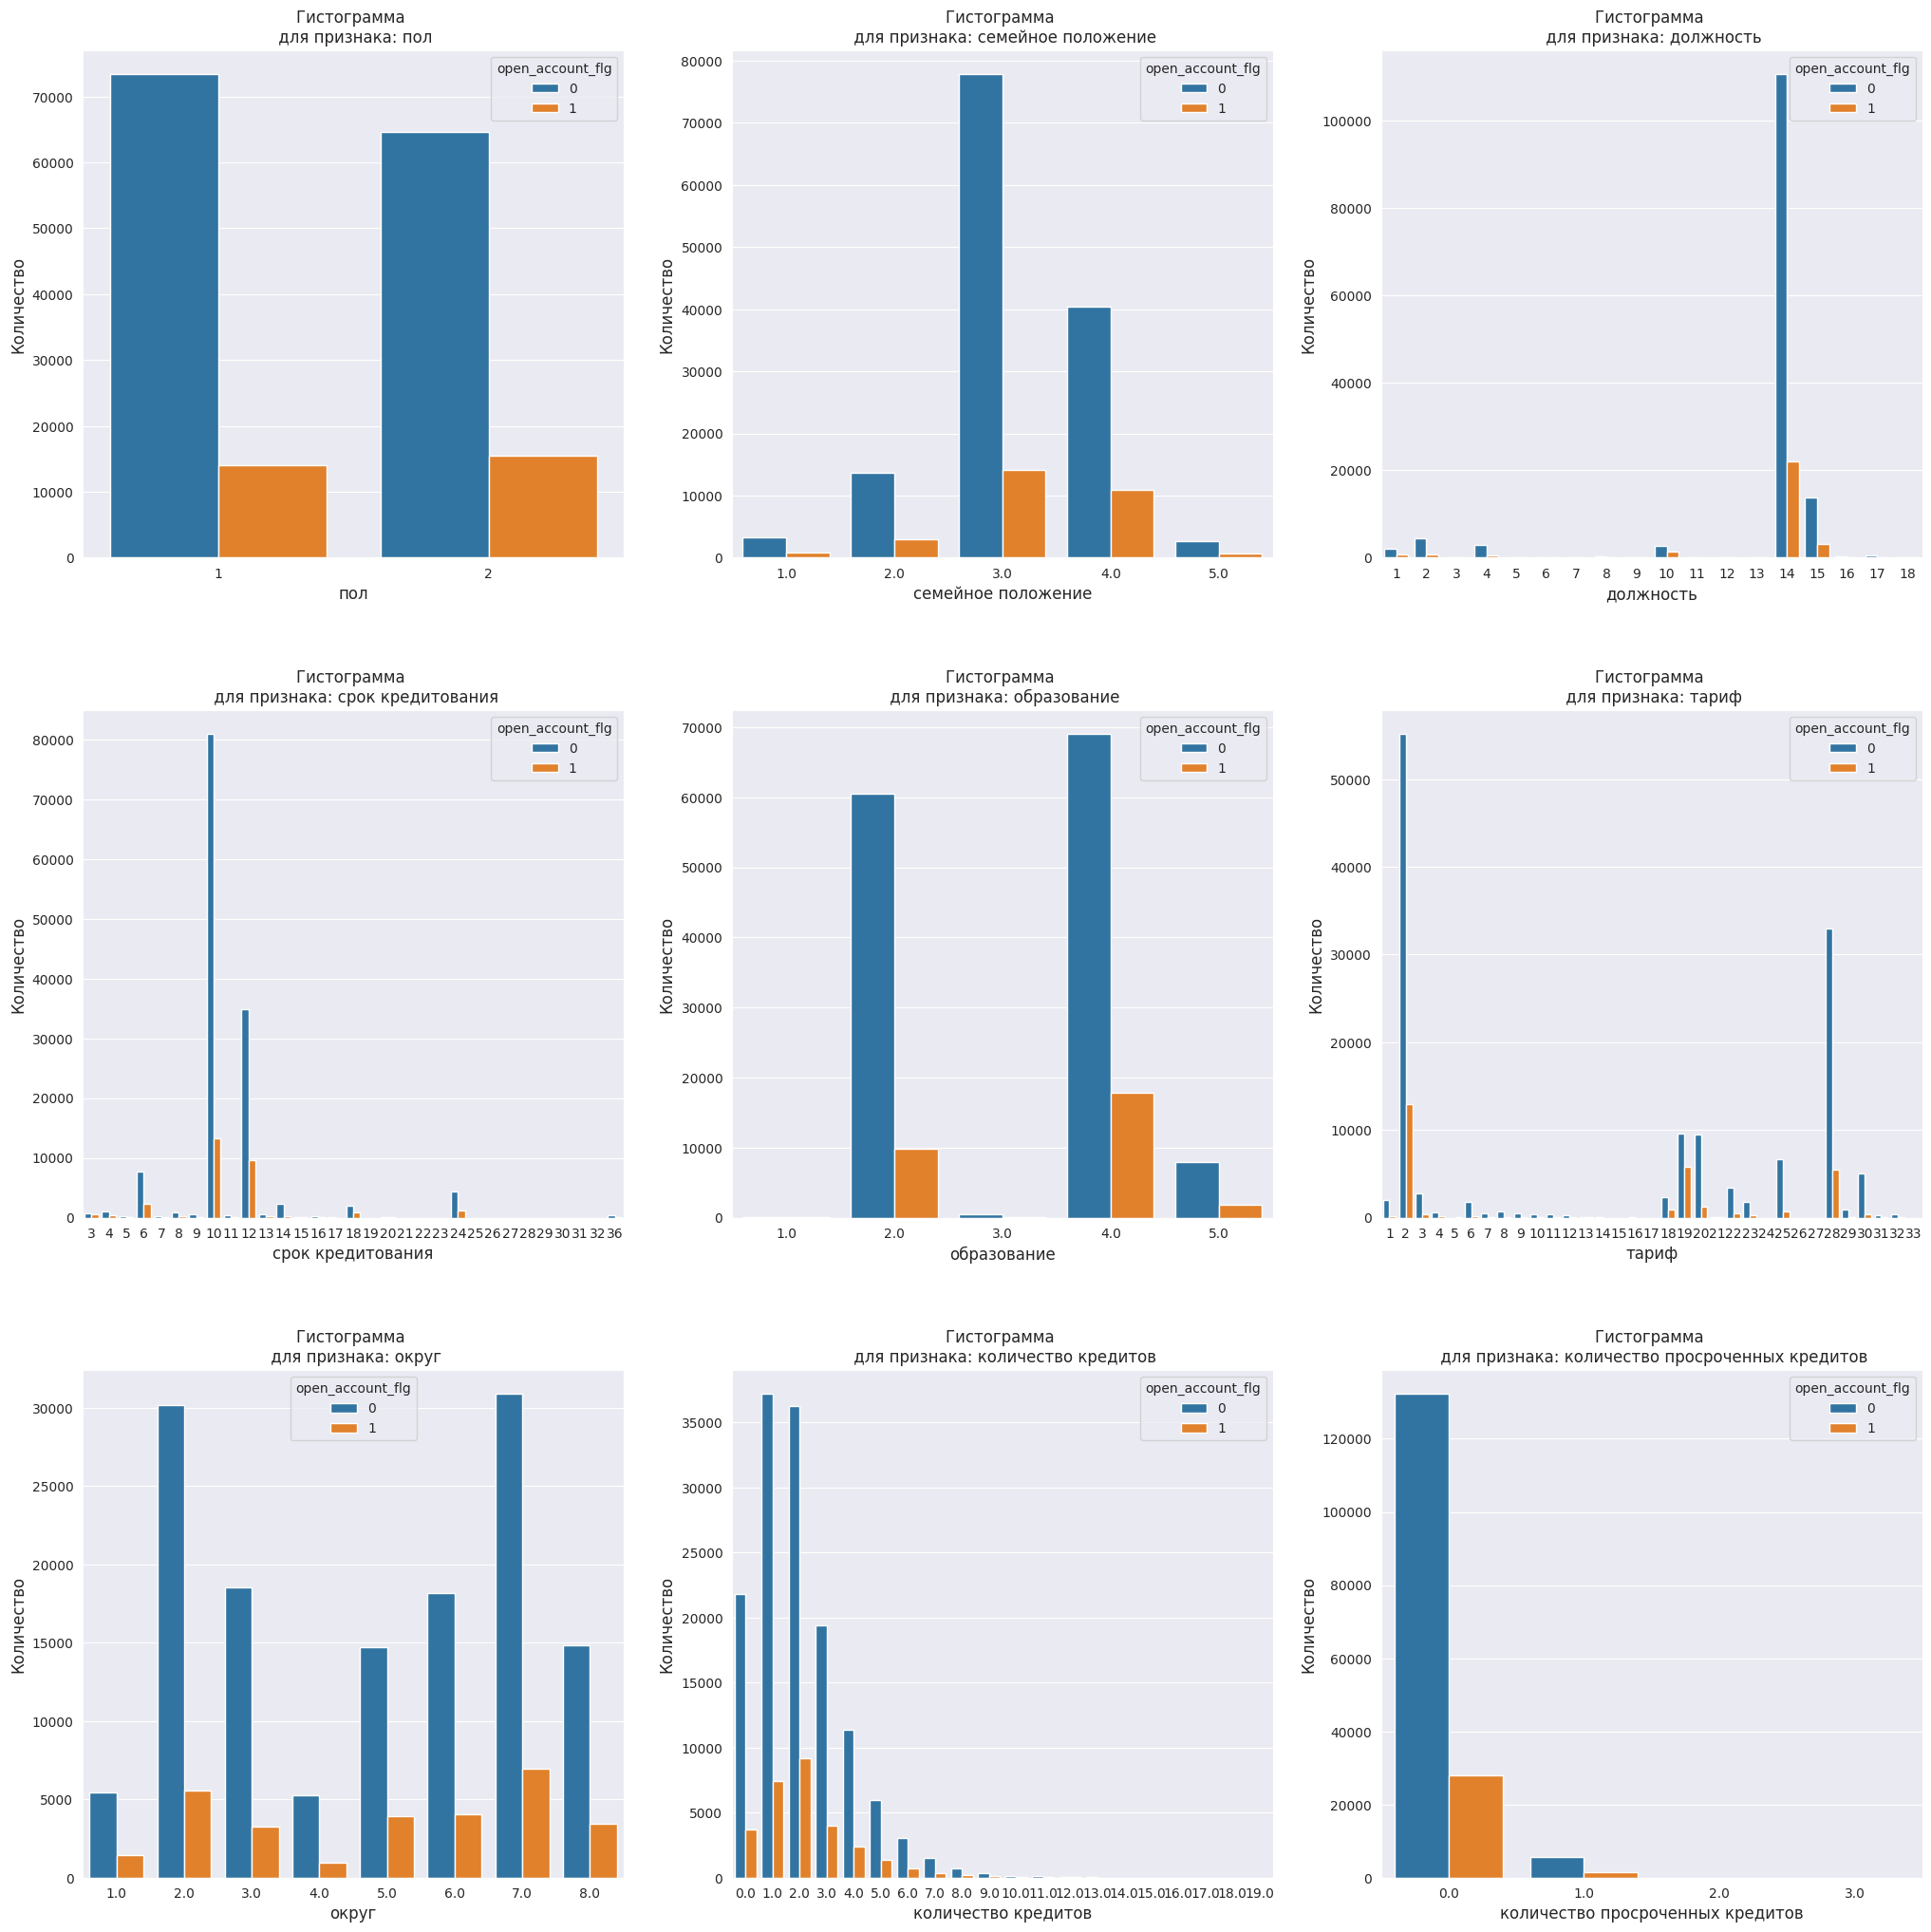

In [ ]:
fig, axes = plt.subplots(4, sharey=True, figsize=(25, 25))
i=0
for i, col in enumerate(cat_var):
    plt.subplot(3,3,i+1)
    sns.countplot(x = col, data = df_copy, hue = 'open_account_flg')
    plt.title("Гистограмма \n для признака: {}".format(dict_to_rus[col]))
    plt.xlabel(dict_to_rus[col], fontsize = 12)
    plt.ylabel('Количество', fontsize = 12)
    plt.subplots_adjust(hspace = 0.3)

Визуально большой разницы между двумя группами целевого признака нет.

Проверка гипотез о статистической значимости признаков категориальных признаков. Создадим функцию для проверки гипотез:


In [ ]:
def test_z_criterion(col, goal, alpha):
    gen_group_shape = df_copy[col].value_counts()
    goal_group_shape = df_copy.groupby(col)[goal].sum()
    p = goal_group_shape / gen_group_shape
    p_combined = goal_group_shape.sum() / gen_group_shape.sum()
    difference = p.iloc[0] - p.iloc[1]
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/gen_group_shape.iloc[0] + 1/gen_group_shape.iloc[1]))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('Результаты проверки гипотезы H_0 по z-критерию:')
    print('Уровень значимости alpha={:.2f}'.format(alpha))
    print('P-value: {:.2f}'.format(p_value))
    if p_value < alpha:
        print(f"""Отвергаем нулевую гипотезу: разница в долях
по признаку <<{col}>> статистически значима.""")
    else: print(f"""Не получилось отвергнуть нулевую гипотезу: разница в долях по
признаку <<{col}>> статистически незначима.""")
    print('--------------------------------------------')

Применим функцию к каждому категориальному признаку с использованием цикла:

In [ ]:
for col in cat_var:
    test_z_criterion(col, 'open_account_flg', 0.05)

Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по признаку <<gender>> статистически значима.
--------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по признаку <<marital_status>> статистически значима.
--------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по признаку <<job_position>> статистически значима.
--------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях
по признаку <<credit_month>> статистически значима.
--------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha

Для выяснения степени влияния признаков на целевую переменную - open_account_flg (факт открытия счета в банке) строим корреляционную матрицу.

<ipython-input-36-0dbc9b7e36a7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  upp_mat = np.triu(df_copy.corr())
<ipython-input-36-0dbc9b7e36a7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_copy.corr().round(2), vmin = -1, vmax = +1, annot = True, cmap = 'PiYG', mask = upp_mat)


Text(0.5, 1.0, 'Матрица корреляций')

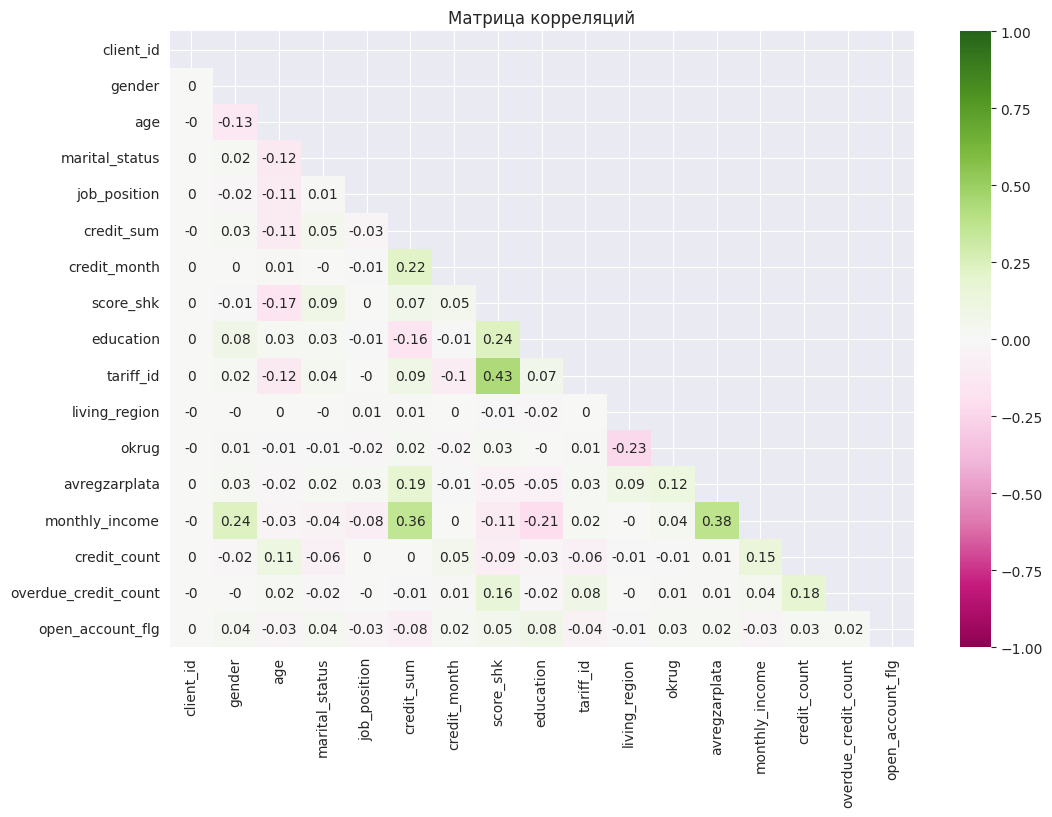

In [ ]:
fig, ax = plt.subplots(1, figsize = (12, 8))
upp_mat = np.triu(df_copy.corr())
sns.heatmap(df_copy.corr().round(2), vmin = -1, vmax = +1, annot = True, cmap = 'PiYG', mask = upp_mat)
plt.title('Матрица корреляций')

Произведем отбор наиболее значимых признаков исходя из значений корреляционной матрицы:
*   сумма кредита
*   образование
*   скоринговую оценку

т.к. они имеют наиболее высокую степень корреляции с целевой переменной open_account_flg (факт открытия счета).


Рассмотрим признак 'gender'. Обозначим признак:

1 - женщины

2 - мужчины



In [ ]:
df_1 = df_copy[df_copy["open_account_flg"] == 1]
df_1_count = df_1.groupby('gender')['client_id'].count().reset_index()
df_1_count['procentage'] = ((df_1_count['client_id']*100) / df_1_count['client_id'].sum()).round(2)
display(df_1_count)
print('--' * 20)
df_0 = df_copy[df_copy["open_account_flg"] == 0]
df_0_count = df_0.groupby('gender')['client_id'].count().reset_index()
df_0_count['procentage'] = ((df_0_count['client_id']*100) / df_0_count['client_id'].sum()).round(2)
display(df_0_count)

,gender,client_id,procentage
0,1,14000,47.38
1,2,15549,52.62


----------------------------------------


,gender,client_id,procentage
0,1,73379,53.2
1,2,64554,46.8


Вывод:
по признаку "пол" - мужчины склонны больше открывать счет в банке, чем женщины.


Рассмотри признак "семейное положение":

In [ ]:
df_1 = df_copy[df_copy["open_account_flg"] == 1]
df_1_count = df_1.groupby('marital_status')['client_id'].count().reset_index()
df_1_count['procentage'] = ((df_1_count['client_id']*100) / df_1_count['client_id'].sum()).round(2)
df_1_count = df_1_count.sort_values(by='procentage', ascending=False)
display(df_1_count)
print('--' * 20)
df_0 = df_copy[df_copy["open_account_flg"] == 0]
df_0_count = df_0.groupby('marital_status')['client_id'].count().reset_index()
df_0_count['procentage'] = ((df_0_count['client_id']*100) / df_0_count['client_id'].sum()).round(2)
df_0_count = df_0_count.sort_values(by='procentage', ascending=False)
display(df_0_count)

,marital_status,client_id,procentage
2,3.0,14085,47.67
3,4.0,10866,36.77
1,2.0,3035,10.27
0,1.0,832,2.82
4,5.0,731,2.47


----------------------------------------


,marital_status,client_id,procentage
2,3.0,77829,56.43
3,4.0,40466,29.34
1,2.0,13641,9.89
0,1.0,3283,2.38
4,5.0,2714,1.97


Вывод: Сильных различий нет

Рассмотрим признак "занимаемая должность"

In [ ]:
df_1 = df_copy[df_copy["open_account_flg"] == 1]
df_1_count = df_1.groupby('job_position')['client_id'].count().reset_index()
df_1_count['procentage'] = ((df_1_count['client_id']*100) / df_1_count['client_id'].sum()).round(2)
df_1_count = df_1_count.sort_values(by='procentage', ascending=False)
display(df_1_count.head(5))
print('--' * 20)
df_0 = df_copy[df_copy["open_account_flg"] == 0]
df_0_count = df_0.groupby('job_position')['client_id'].count().reset_index()
df_0_count['procentage'] = ((df_0_count['client_id']*100) / df_0_count['client_id'].sum()).round(2)
df_0_count = df_0_count.sort_values(by='procentage', ascending=False)
display(df_0_count.head(5))

,job_position,client_id,procentage
13,14,22135,74.91
14,15,3235,10.95
9,10,1483,5.02
1,2,831,2.81
0,1,805,2.72


----------------------------------------


,job_position,client_id,procentage
12,14,110709,80.26
13,15,13855,10.04
1,2,4365,3.16
3,4,2897,2.10
8,10,2603,1.89


Вывод: по группе клиентов, открывших карту в банке наиболее распространена должность с кодом 13. в другой группе - с кодом 12.

Рассмотрим признак "образование"

In [ ]:
df_1 = df_copy[df_copy["open_account_flg"] == 1]
df_1_count = df_1.groupby('education')['client_id'].count().reset_index()
df_1_count['procentage'] = ((df_1_count['client_id']*100) / df_1_count['client_id'].sum()).round(2)
df_1_count = df_1_count.sort_values(by='procentage', ascending=False)
display(df_1_count)
print('--' * 20)
df_0 = df_copy[df_copy["open_account_flg"] == 0]
df_0_count = df_0.groupby('education')['client_id'].count().reset_index()
df_0_count['procentage'] = ((df_0_count['client_id']*100) / df_0_count['client_id'].sum()).round(2)
df_0_count = df_0_count.sort_values(by='procentage', ascending=False)
display(df_0_count)

,education,client_id,procentage
3,4.0,17806,60.26
1,2.0,9829,33.26
4,5.0,1799,6.09
2,3.0,93,0.31
0,1.0,22,0.07


----------------------------------------


,education,client_id,procentage
3,4.0,69000,50.02
1,2.0,60480,43.85
4,5.0,7963,5.77
2,3.0,420,0.30
0,1.0,70,0.05


Вывод: образование не оказывает влияние на факт открытия карты в банке.

Рассмотрим признак 'Регион проживания'

In [ ]:
df_1 = df_copy[df_copy["open_account_flg"] == 1]
df_1_count = df_1.groupby('living_region')['client_id'].count().reset_index()
df_1_count['procentage'] = ((df_1_count['client_id']*100) / df_1_count['client_id'].sum()).round(2)
df_1_count = df_1_count.sort_values(by='procentage', ascending=False)
display(df_1_count.head(5))
print('--' * 20)
df_0 = df_copy[df_copy["open_account_flg"] == 0]
df_0_count = df_0.groupby('living_region')['client_id'].count().reset_index()
df_0_count['procentage'] = ((df_0_count['client_id']*100) / df_0_count['client_id'].sum()).round(2)
df_0_count = df_0_count.sort_values(by='procentage', ascending=False)
display(df_0_count.head(5))

,living_region,client_id,procentage
30,31.0,2178,7.37
29,30.0,1797,6.08
71,73.0,1706,5.77
22,23.0,1639,5.55
61,63.0,1186,4.01


----------------------------------------


,living_region,client_id,procentage
30,31.0,10206,7.40
61,63.0,6844,4.96
29,30.0,6844,4.96
71,73.0,6818,4.94
22,23.0,6547,4.75


Вывод: по обоим группам лидирует 30-й регион. Второй и третий регионы по количеству клиентов открывших карту - 29 и 71, а в группе клиентов не открывших карту в банке - 61 и 29.

Рассмотрим признак 'Количество просроченных кредитов'

In [ ]:
df_1 = df_copy[df_copy["open_account_flg"] == 1]
df_1_count = df_1.groupby('overdue_credit_count')['client_id'].count().reset_index()
df_1_count['procentage'] = ((df_1_count['client_id']*100) / df_1_count['client_id'].sum()).round(2)
df_1_count = df_1_count.sort_values(by='procentage', ascending=False)
display(df_1_count)
print('--' * 20)
df_0 = df_copy[df_copy["open_account_flg"] == 0]
df_0_count = df_0.groupby('overdue_credit_count')['client_id'].count().reset_index()
df_0_count['procentage'] = ((df_0_count['client_id']*100) / df_0_count['client_id'].sum()).round(2)
df_0_count = df_0_count.sort_values(by='procentage', ascending=False)
display(df_0_count)

,overdue_credit_count,client_id,procentage
0,0.0,28082,95.04
1,1.0,1450,4.91
2,2.0,16,0.05
3,3.0,1,0.00


----------------------------------------


,overdue_credit_count,client_id,procentage
0,0.0,132202,95.85
1,1.0,5693,4.13
2,2.0,34,0.02
3,3.0,4,0.00


Вывод: по признаку количества просроченных кредитов почти 5% откывали карту в банке, а те кто не открывали - чуть меньше - 4,13%.


## **Вывод по выпускной работе к поставленной аналитической задаче**

Был произведен анализ датасета банка с целью выявления портрета клиента, склонного к отрытию счета.
Для этого была применена предварительная обработка данных - приведены типы, обработаны пропуски (некоторые удалены, а некоторые заполнены медианными значениями). В ходе работы с аномальными значенииями был получен следующий вывод:

Рекомендуется рассмотреть и проанализировать отдельно клиентов, имеющих доход свыше 120 000 и, если сумма кредита превышает 75 314 руб. Возможно выделить их в отдельный датасет как вип-клиентов.

Исследовательский анализ данных показал следующее:

Гипотезы были проверены на нормальность распределения- никакой из признаков не подчиняется нормальному распределению, несмотря на то, что график плотности скоринговой оценки говорит нам об обратном.
Проверка гипотез о влиянии на целевую переменную подтвердила, что средняя заработная плата по региону не влияет на открытие счета в банке, в отличае от остальных признаков.

На основе проанализированных данных построен портрет клиента, который потенциально будет открывать карту в данном банке:

**Описание портрета:**

*   Мужчина
*   Возраст: 33 года
*   Средний ежемесячный доход 34 000 р.
*   Средняя сумма кредита 19 588 р.
*   Средняя скоринговая оценка 0,47
*   Занимающий должность с кодом 13
*   Получивший образование с кодом 3
*   Проживающий в регионах: 30, 29 и 71
*   Процент клиентов с просроченными кредитами 4,9%

**Описание портрета клиента, который не будет открывать карту в банке:**

*   Женщина
*   Возраст: 35 лет
*   Средний ежемесячный доход 35 000 р.
*   Средняя сумма кредита 21 344 р.
*   Средняя скоринговая оценка 0,46
*   Занимающий должность с кодом 12
*   Получивший образование с кодом 3 и 1
*   Проживающий в регионах: 30, 61 и 29
*   Процент клиентов с просроченными кредитами 4,1%